In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm.notebook import tqdm_notebook, tnrange
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.layers import concatenate,add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import img_to_array,load_img,array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob

In [2]:
im_width = 512
im_height = 512

In [3]:
total = 0
total_count = []
folders = []
root = "/Users/anveshsk/Dropbox/MyMac /Desktop/Capstone/train"
for filename in os.listdir(root):
    if filename != ".DS_Store":
        folders.append(filename)
        ids = next(os.walk(root+'/'+filename))[2]# list of names all images in the given path
        total_count.append()
        total +=len(ids)
print("Number of images and masks = ", total)
folders

Number of images and masks =  457


['SS_EA031', 'SS_045', 'EA036_SS', 'SS', 'SS_EA_050', 'SS_3', 'SS_EA026']

In [4]:
X = np.zeros((int(total/2), im_height, im_width, 1), dtype=np.float32)
y = np.zeros((int(total/2), im_height, im_width, 1), dtype=np.float32)

In [5]:
root = r"C:\Users\Ankit P Bisleri\OneDrive\Desktop\CTs_img+mask"
train_images = []
train_masks = [] 
count_img = 0
count_mask = 0

for file in folders : 
    image_dir_path = root+ "\\" +file
    mask_dir_path =  root+ "\\" +file
    
 
    
    for img_path in tqdm(sorted(glob.glob(os.path.join(image_dir_path, "*_img.png")))):
        img = load_img(img_path, color_mode = "grayscale")
        img = img_to_array(img)
        img = resize(img, (512, 512, 1), mode = 'constant', preserve_range = True)
        img = img/255.0
        X[count_img]=img 
        count_img+=1
    print("Image upload count = ", count_img)
        
        
    for mask_path in tqdm(sorted(glob.glob(os.path.join(mask_dir_path, "*_mask.png")))):
        mask = load_img(mask_path, color_mode = "grayscale")
        mask = img_to_array(mask)
        mask = resize(mask, (512, 512, 1), mode = 'constant', preserve_range = True)
        mask = mask/255.0
        y[count_mask]=mask
        count_mask+=1
    print("Mask upload count = ", count_mask)

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 26.99it/s]


Image upload count =  31


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 20.87it/s]


Mask upload count =  31


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 21.07it/s]


Image upload count =  55


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 30.20it/s]


Mask upload count =  55


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 28.48it/s]


Image upload count =  78


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 33.20it/s]


Mask upload count =  78


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 35.06it/s]


Image upload count =  99


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 35.21it/s]


Mask upload count =  99


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 30.51it/s]


Image upload count =  130


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 31.40it/s]


Mask upload count =  130


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 28.06it/s]


Image upload count =  153


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 35.19it/s]


Mask upload count =  153


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 37.33it/s]


Image upload count =  174


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 31.43it/s]


Mask upload count =  174


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 27.79it/s]


Image upload count =  196


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 30.92it/s]


Mask upload count =  196


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.33it/s]


Image upload count =  226


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.81it/s]


Mask upload count =  226


100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [00:02<00:00, 32.41it/s]


Image upload count =  304


100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [00:02<00:00, 34.59it/s]


Mask upload count =  304


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 32.73it/s]


Image upload count =  326


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 38.99it/s]


Mask upload count =  326


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 36.49it/s]


Image upload count =  353


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 33.31it/s]


Mask upload count =  353


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 27.67it/s]


Image upload count =  372


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 30.78it/s]


Mask upload count =  372


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 29.61it/s]


Image upload count =  400


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 33.73it/s]


Mask upload count =  400


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 39.36it/s]


Image upload count =  426


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 29.52it/s]


Mask upload count =  426


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 27.51it/s]


Image upload count =  451


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 33.11it/s]

Mask upload count =  451


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [7]:
len(X_train)

360

In [8]:
len(X_valid)

91

Text(0.5, 1.0, 'Mask')

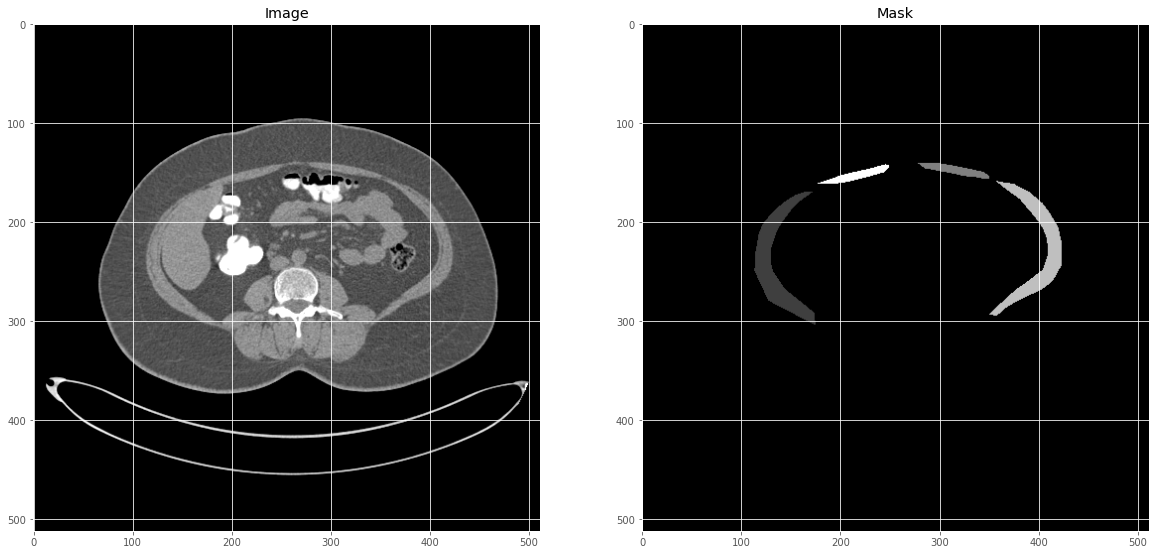

In [9]:
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0 # salt indicator

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 15))

ax1.imshow(X_train[ix, ..., 0], cmap = 'gray', interpolation = 'bilinear')

ax1.set_title('Image')

ax2.imshow(y_train[ix], cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('Mask')

In [10]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [11]:
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1) 
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    p5 = MaxPooling2D((2, 2))(c5)
    p5 = Dropout(dropout)(p5)
    
    c6 = conv2d_block(p5, n_filters * 32, kernel_size = 3, batchnorm = batchnorm)
    p6 = MaxPooling2D((2, 2))(c6)
    p6 = Dropout(dropout)(p6)
    
    c7 = conv2d_block(p6, n_filters = n_filters * 64, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    
    u8 = Conv2DTranspose(n_filters * 32, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c6])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 32, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 16, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c5])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    u10 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c9)
    u10 = concatenate([u10, c4])
    u10 = Dropout(dropout)(u10)
    c10 = conv2d_block(u10, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u11 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c10)
    u11 = concatenate([u11, c3])
    u11 = Dropout(dropout)(u11)
    c11 = conv2d_block(u11, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u12 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c11)
    u12 = concatenate([u12, c2])
    u12 = Dropout(dropout)(u12)
    c12 = conv2d_block(u12, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u13 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c12)
    u13 = concatenate([u13, c1])
    u13 = Dropout(dropout)(u13)
    c13 = conv2d_block(u13, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c13)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [12]:
from keras import backend as K


def dice_loss(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f* y_pred_f)
    val = (2. * intersection + K.epsilon()) / (K.sum(y_true_f * y_true_f) + K.sum(y_pred_f * y_pred_f) + K.epsilon())
    return 1. - val

In [13]:
input_img = Input((im_height, im_width, 1), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
model.compile(optimizer=Adam(), loss=dice_loss, metrics=["accuracy"])

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  160         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

 conv2d_7 (Conv2D)              (None, 64, 64, 128)  147584      ['activation_6[0][0]']           
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 64, 64, 128)  512        ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_7 (Activation)      (None, 64, 64, 128)  0           ['batch_normalization_7[0][0]']  
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 32, 32, 128)  0          ['activation_7[0][0]']           
                                                                                                  
 dropout_3 (Dropout)            (None, 32, 32, 128)  0           ['max_pooling2d_3[0][0]']        
          

                                                                                                  
 conv2d_transpose_1 (Conv2DTran  (None, 32, 32, 256)  1179904    ['activation_15[0][0]']          
 spose)                                                                                           
                                                                                                  
 concatenate_1 (Concatenate)    (None, 32, 32, 512)  0           ['conv2d_transpose_1[0][0]',     
                                                                  'activation_9[0][0]']           
                                                                                                  
 dropout_7 (Dropout)            (None, 32, 32, 512)  0           ['concatenate_1[0][0]']          
                                                                                                  
 conv2d_16 (Conv2D)             (None, 32, 32, 256)  1179904     ['dropout_7[0][0]']              
          

                                                                                                  
 batch_normalization_22 (BatchN  (None, 256, 256, 32  128        ['conv2d_22[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 activation_22 (Activation)     (None, 256, 256, 32  0           ['batch_normalization_22[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 256, 256, 32  9248        ['activation_22[0][0]']          
                                )                                                                 
                                                                                                  
 batch_nor

In [15]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.001, verbose=1),
    ModelCheckpoint('model_all-tgs-salt.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [16]:
results = model.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=callbacks,\
                    validation_data=(X_valid, y_valid))

Epoch 1/50
12/12 [==============================] - ETA: 0s - loss: 0.8833 - accuracy: 0.7085 
Epoch 1: val_loss improved from inf to 1.00000, saving model to model_all-tgs-salt.h5
12/12 [==============================] - 436s 35s/step - loss: 0.8833 - accuracy: 0.7085 - val_loss: 1.0000 - val_accuracy: 0.9653 - lr: 0.0010
Epoch 2/50
12/12 [==============================] - ETA: 0s - loss: 0.7739 - accuracy: 0.9040 
Epoch 2: val_loss did not improve from 1.00000
12/12 [==============================] - 422s 35s/step - loss: 0.7739 - accuracy: 0.9040 - val_loss: 1.0000 - val_accuracy: 0.9651 - lr: 0.0010
Epoch 3/50
12/12 [==============================] - ETA: 0s - loss: 0.6660 - accuracy: 0.9588 
Epoch 3: val_loss improved from 1.00000 to 0.99975, saving model to model_all-tgs-salt.h5
12/12 [==============================] - 414s 34s/step - loss: 0.6660 - accuracy: 0.9588 - val_loss: 0.9998 - val_accuracy: 0.9573 - lr: 0.0010
Epoch 4/50
12/12 [==============================] - ETA: 0s 

Epoch 27/50
12/12 [==============================] - ETA: 0s - loss: 0.0599 - accuracy: 0.9679 
Epoch 27: val_loss improved from 0.09864 to 0.08839, saving model to model_all-tgs-salt.h5
12/12 [==============================] - 409s 34s/step - loss: 0.0599 - accuracy: 0.9679 - val_loss: 0.0884 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 28/50
12/12 [==============================] - ETA: 0s - loss: 0.0575 - accuracy: 0.9679 
Epoch 28: val_loss improved from 0.08839 to 0.08294, saving model to model_all-tgs-salt.h5
12/12 [==============================] - 417s 35s/step - loss: 0.0575 - accuracy: 0.9679 - val_loss: 0.0829 - val_accuracy: 0.9668 - lr: 0.0010
Epoch 29/50
12/12 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9679 
Epoch 29: val_loss improved from 0.08294 to 0.06460, saving model to model_all-tgs-salt.h5
12/12 [==============================] - 395s 33s/step - loss: 0.0532 - accuracy: 0.9679 - val_loss: 0.0646 - val_accuracy: 0.9673 - lr: 0.0010
Epoch 3

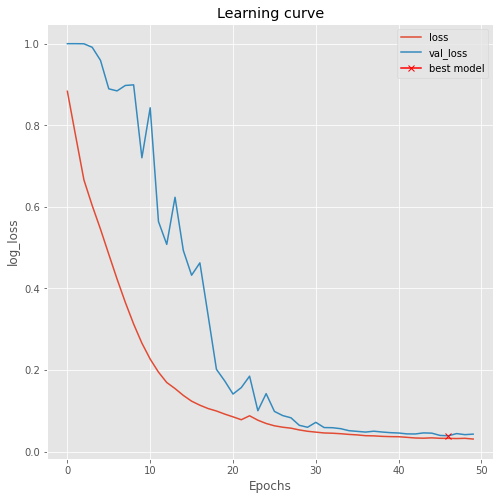

In [17]:
#plotting Learning curve ( log_loss vs epochs)
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [19]:
# load the best model
model.load_weights('model_all-tgs-salt.h5')

In [20]:
# Evaluate on validation set (this must be equals to the best log_loss)
model.evaluate(X_valid, y_valid, verbose=1)

3/3 [==============================] - 15s 5s/step - loss: 0.0388 - accuracy: 0.9678


[0.03881797194480896, 0.9678322672843933]

In [21]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)

3/3 [==============================] - 15s 5s/step


In [22]:
# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [46]:
#Function for viewing plots and predictions
def plot_sample(X, y, preds,ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(X[ix], cmap='gray')
    ax[0].set_title('Input')

    ax[1].imshow(y[ix].squeeze(),cmap='gray')
    ax[1].set_title('Mask')

    ax[2].imshow(preds[ix].squeeze(),cmap='gray')
    ax[2].set_title('Mask Predicted')

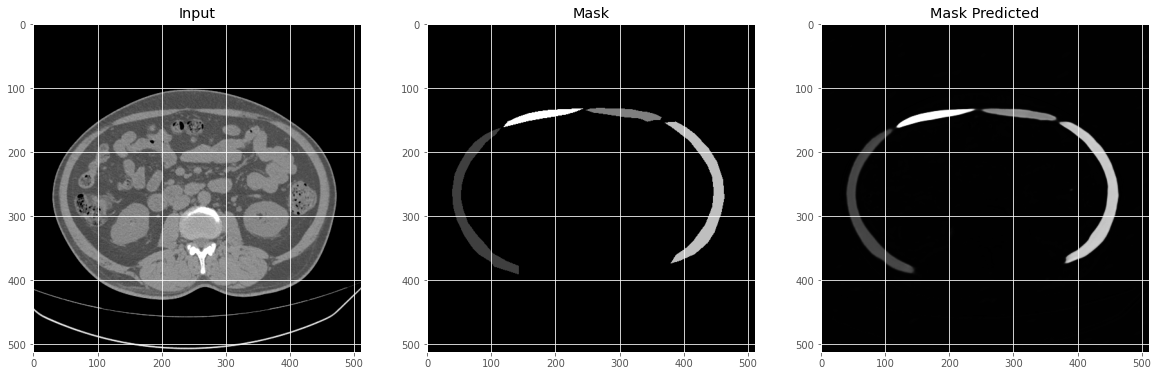

In [72]:
plot_sample(X_valid, y_valid, preds_val)